In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
GSS = pd.read_stata("~/desktop/Python/data/gss2018python.dta")
# For no clear reason, this gets ported to a categorical...
data = GSS["childs"].cat.codes

# Following this...https://archive.ph/J5m0r
# Given an array a of values, you compute the empirical CDF by first obtaining the frequencies of the values. 
# The numpy function unique() is helpful here because it returns not only the frequencies, but also the values 
# in sorted order. To calculate the cumulative distribution, use the cumsum() function, and divide by the total sum. 
# The following function returns the values in sorted order and the corresponding cumulative distribution:
def ecdf(a):
    x, counts = np.unique(a, return_counts=True)
    cusum = np.cumsum(counts)
    return cusum / cusum[-1]
data.value_counts()
# We need to omit the -1s
data = data[data > -1]

/Users/gjmb/anaconda3/lib/python3.9/site-packages/pandas/io/stata.py:1514: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  warnings.warn(msg, UnicodeWarning)


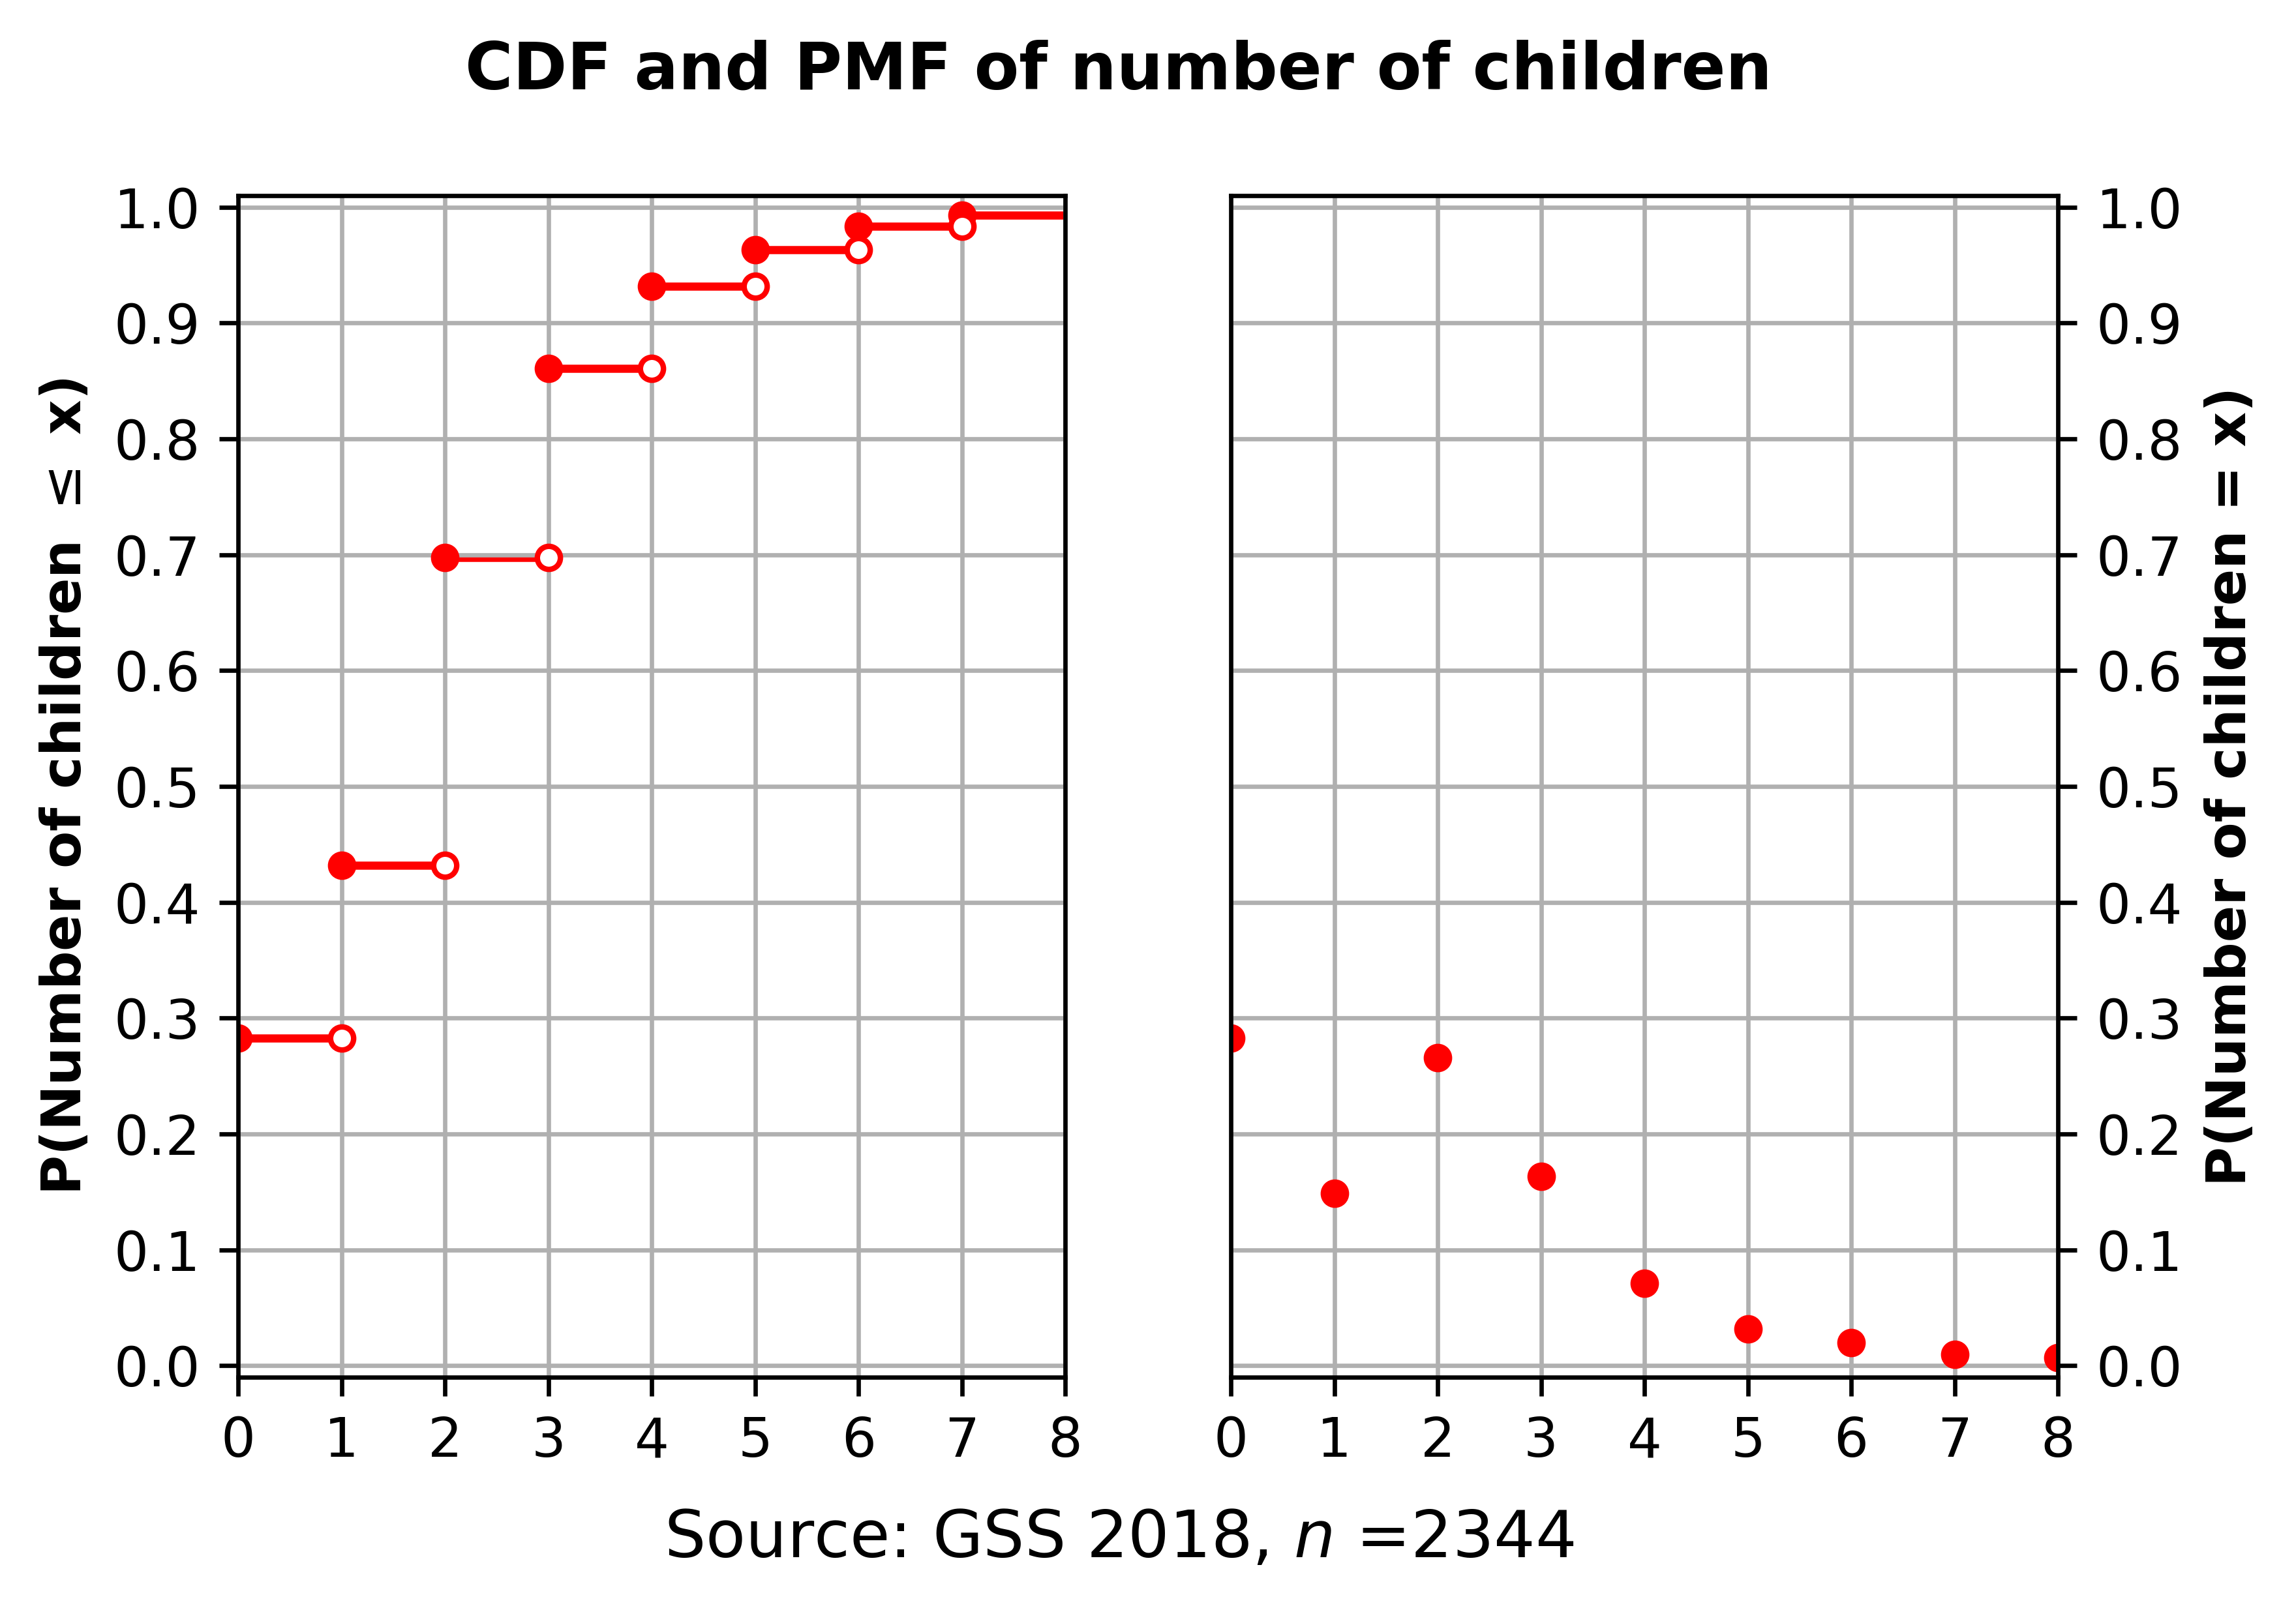

In [9]:
fig = plt.figure(dpi=600)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

yn = ecdf(data)
yn = yn[:-1]
yn
unique_values = set(data)
unique_values = list(unique_values)


# Ax1 stuff
ax1.hlines(y=yn, xmin=unique_values[:-1], xmax=unique_values[1:],
          color='red', zorder=1)

# https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.vlines.html

ax1.scatter(unique_values[:-1], yn, color='red', s=18, zorder=2)
ax1.scatter(unique_values[1:-1], yn[:-1], color='white', s=18, zorder=2,
           edgecolor='red')
ax1.grid(True)
ax1.set_xlim(0, 8)
ax1.set_ylim([-0.01, 1.01]) 
fig.suptitle("CDF and PMF of number of children", fontweight='bold')
ax1.set_ylabel("P(Number of children $\leq$ x)", fontweight='bold') 
x_n = len(data)
txt = "Source: GSS 2018, $\it{n}$ =" + f'{x_n}'
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
ax1.set_xticks(unique_values)
ticks = np.arange(0, 1.05, 0.1)
ax1.set_yticks(ticks)

#ax2 stuff
probabilities = data.value_counts(normalize=True, sort=False).sort_index()

ax2.scatter(unique_values[:], probabilities, color='red', s=18, zorder=2)
ax2.grid(True)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.set_xlim(0, 8)
ax2.set_ylim([-0.01, 1.01])
ax2.set_ylabel("P(Number of children = x)", fontweight='bold') 
ax2.set_xticks(unique_values)
ax2.set_yticks(ticks)
plt.savefig("/Users/gjmb/desktop/pmfcdfnumkids.pdf")